In [23]:
#SQL DATABASES TAKES FOREVER TO LOAD THIS DMAN THING 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3
import matplotlib.font_manager as font_manager
import numpy as np
import scipy.stats as stats


In [24]:
all_merged = pd.read_csv('/Users/carlosgovea/Documents/Flatiron/DSNYC103122/Phase-1-project-template/zippedData/all_merged.csv')

In [25]:
foreign_gb = all_merged.groupby(['year','foreign_gross']).mean()
domestic_gb = all_merged.groupby(['year','domestic_gross']).mean()
all_merged = all_merged[all_merged['foreign_gross'].notna()]

In [26]:
#foreign_gb.drop(['domestic_gross','id','production_budget','worldwide_gross','release_year','popularity','runtime_minutes','profit','profit_rate'],axis=1,inplace=True)
#domestic_gb.drop(['foreign_gross','id','production_budget','worldwide_gross','release_year','popularity','runtime_minutes','profit','profit_rate'],axis=1, inplace=True)

share_distribution= all_merged[['foreign_gross','domestic_gross','year']]

In [27]:
foreign_share_distribution = share_distribution.groupby(['year'])['foreign_gross'].mean()

In [532]:
#foreign_share_distribution.min()
all_merged

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,studio,foreign_gross,year,genre_ids,popularity,movie_id,runtime_minutes,genres,profit,profit_rate,profitability
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,BV,804600000.0,2011,"[12, 28, 14]",30.579,tt1298650,136.0,"Action,Adventure,Fantasy",6.350639e+08,154.667286,Moderate
1,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,BV,946400000.0,2015,"[28, 12, 878]",44.383,tt2395427,141.0,"Action,Adventure,Sci-Fi",1.072414e+09,324.384139,High
3,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,2017,WB,428900000.0,2017,"[28, 12, 14, 878]",34.953,tt0974015,120.0,"Action,Adventure,Fantasy",3.559452e+08,118.648403,Moderate
4,10,2015-11-06,Spectre,300000000.0,200074175.0,8.796209e+08,2015,Sony,680600000.0,2015,"[28, 12, 80]",30.318,tt2379713,148.0,"Action,Adventure,Thriller",5.796209e+08,193.206974,Moderate
5,11,2012-07-20,The Dark Knight Rises,275000000.0,448139099.0,1.084439e+09,2012,WB,636800000.0,2012,"[28, 80, 18, 53]",26.220,tt1345836,164.0,"Action,Thriller",8.094391e+08,294.341491,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,70,2012-02-03,Kill List,800000.0,29063.0,4.622060e+05,2012,IFC,143000.0,2012,"[27, 53, 80]",7.036,tt1788391,95.0,"Crime,Drama,Horror",-3.377940e+05,-42.224250,Low
1258,74,2011-10-28,Like Crazy,250000.0,3395391.0,3.728400e+06,2011,ParV,336000.0,2011,"[18, 10749]",10.091,tt1758692,86.0,"Drama,Romance",3.478400e+06,1391.360000,High
1259,74,2011-10-28,Like Crazy,250000.0,3395391.0,3.728400e+06,2011,ParV,336000.0,2011,"[18, 10749]",10.091,tt4621872,116.0,"Comedy,Drama",3.478400e+06,1391.360000,High
1261,48,2011-07-22,Another Earth,175000.0,1321194.0,2.102779e+06,2011,FoxS,456000.0,2011,"[18, 878]",10.030,tt1549572,92.0,"Drama,Romance,Sci-Fi",1.927779e+06,1101.588000,High


In [29]:
domestic_share_distribution = share_distribution.groupby(['year'])['domestic_gross'].mean()
domestic_share_distribution

year
2010    5.380062e+07
2011    5.495173e+07
2012    6.487728e+07
2013    7.496527e+07
2014    7.745431e+07
2015    6.703345e+07
2016    7.203365e+07
2017    7.997205e+07
2018    7.811650e+07
Name: domestic_gross, dtype: float64

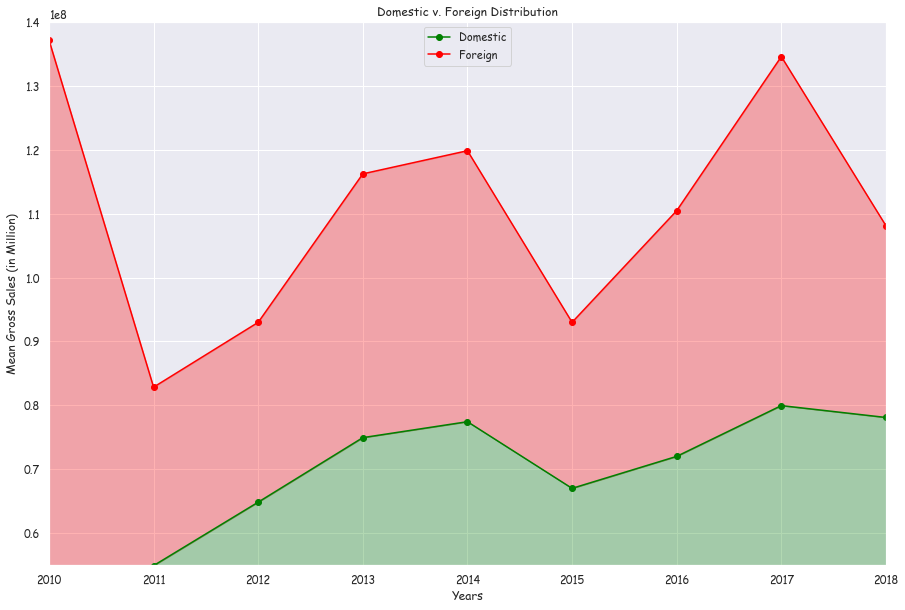

In [191]:
data_range = range(2010,2018)


ax = domestic_share_distribution.plot(marker='o',label='Domestic',color='green')
foreign_share_distribution.plot(ax=ax, marker='o',label='Foreign',color="red")
ax.set_title('Domestic v. Foreign Distribution')
ax.set_xlabel('Years')
ax.set_ylabel('Mean Gross Sales (in Million)')
leg = ax.legend(loc='upper center')
ax.fill_between(domestic_share_distribution.index, foreign_share_distribution.values, 
                domestic_share_distribution.values, alpha = 0.3, color = 'red')
ax.fill_between(domestic_share_distribution.index, domestic_share_distribution.values,
               min(domestic_share_distribution.values), alpha =0.3, color ='green')
ax.set_xlim(2010,2018)
ax.set_ylim(.55e8,1.4e8)
plt.rcParams["figure.figsize"] = (15,10)

plt.savefig("1A_DFD.jpg")

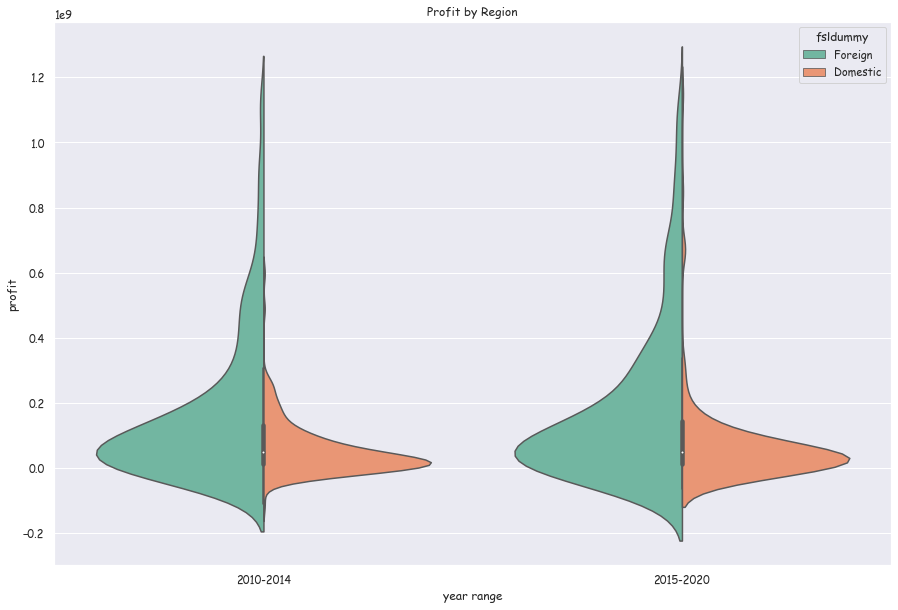

In [523]:
dummies = all_merged.copy()

dummies['domestic_shares'] = (dummies['domestic_gross']/dummies['worldwide_gross'])*100
dummies['foreign_shares'] = (dummies['foreign_gross']/dummies['worldwide_gross'])*100
dummies.loc[dummies['foreign_shares']>50, 'fsdummy'] = 1
dummies.loc[dummies['foreign_shares']<=50, 'fsdummy'] = 0
dummies.loc[dummies['foreign_shares']>50, 'fsldummy'] = 'Foreign'
dummies.loc[dummies['foreign_shares']<=50, 'fsldummy'] = 'Domestic'
dummies.loc[dummies['year']>2014, 'year range'] = 1
dummies.loc[dummies['year']<=2014, 'year range'] = 0
dummies.loc[dummies['year']>2014, 'year range'] = '2015-2020'
dummies.loc[dummies['year']<=2014, 'year range'] = '2010-2014'
#dummies.drop(['fsdummy','yrdummy'], axis=1,inplace=True)
plt.figure(figsize=(15,10))
vio = sns.violinplot(y='profit', x="year range", hue="fsldummy", data=dummies, 
                    palette="Set2", split=True, scale="width", legend_out= True).set(title='Profit by Region')

plt.set_xtitle ='Years'
plt.savefig("1BC_DFD.jpg")

dummies

In [32]:
all_merged


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,studio,foreign_gross,year,genre_ids,popularity,movie_id,runtime_minutes,genres,profit,profit_rate
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,BV,804600000.0,2011,"[12, 28, 14]",30.579,tt1298650,136.0,"Action,Adventure,Fantasy",6.350639e+08,154.667286
1,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,BV,946400000.0,2015,"[28, 12, 878]",44.383,tt2395427,141.0,"Action,Adventure,Sci-Fi",1.072414e+09,324.384139
3,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,2017,WB,428900000.0,2017,"[28, 12, 14, 878]",34.953,tt0974015,120.0,"Action,Adventure,Fantasy",3.559452e+08,118.648403
4,10,2015-11-06,Spectre,300000000.0,200074175.0,8.796209e+08,2015,Sony,680600000.0,2015,"[28, 12, 80]",30.318,tt2379713,148.0,"Action,Adventure,Thriller",5.796209e+08,193.206974
5,11,2012-07-20,The Dark Knight Rises,275000000.0,448139099.0,1.084439e+09,2012,WB,636800000.0,2012,"[28, 80, 18, 53]",26.220,tt1345836,164.0,"Action,Thriller",8.094391e+08,294.341491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,70,2012-02-03,Kill List,800000.0,29063.0,4.622060e+05,2012,IFC,143000.0,2012,"[27, 53, 80]",7.036,tt1788391,95.0,"Crime,Drama,Horror",-3.377940e+05,-42.224250
1258,74,2011-10-28,Like Crazy,250000.0,3395391.0,3.728400e+06,2011,ParV,336000.0,2011,"[18, 10749]",10.091,tt1758692,86.0,"Drama,Romance",3.478400e+06,1391.360000
1259,74,2011-10-28,Like Crazy,250000.0,3395391.0,3.728400e+06,2011,ParV,336000.0,2011,"[18, 10749]",10.091,tt4621872,116.0,"Comedy,Drama",3.478400e+06,1391.360000
1261,48,2011-07-22,Another Earth,175000.0,1321194.0,2.102779e+06,2011,FoxS,456000.0,2011,"[18, 878]",10.030,tt1549572,92.0,"Drama,Romance,Sci-Fi",1.927779e+06,1101.588000


In [33]:
genre_list= list(set(all_merged['genres'].dropna().values))


In [34]:
unique_genre_list =[]
for genre in genre_list:
    for i in genre.split(','):
        unique_genre_list.append(i)

In [35]:
unique_genre_list = set(unique_genre_list)
unique_genre_list

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [36]:
all_merged['profitability'] =pd.qcut(all_merged['profit_rate'], q=3, labels=['Low','Moderate','High'])

In [37]:
all_merged['profitability'].explode('studio').value_counts()

High        354
Moderate    354
Low         354
Name: profitability, dtype: int64

In [38]:
top_profitable= all_merged.loc[all_merged['profitability']=='High',:]

In [39]:
#top_profitable.explode(list('studio'))
studio_list = list(set(all_merged['studio'].dropna().values))
unique_studio_list =[]
for studio in studio_list:
     unique_studio_list.append(studio)

In [40]:
all_merged['studio'].value_counts()

Uni.           141
Fox            111
WB              92
BV              70
Par.            68
Sony            68
LGF             49
WB (NL)         48
Wein.           48
Focus           42
FoxS            34
Rela.           29
LG/S            25
RAtt.           23
ORF             22
SGem            20
STX             19
TriS            16
IFC             15
SPC             13
A24             11
FD               7
Sum.             7
CBS              7
P/DW             6
MNE              6
W/Dim.           5
Annapurna        5
Studio 8         5
RTWC             4
FCW              4
BST              4
ParV             3
EC               3
BH Tilt          3
Magn.            3
EOne             3
BG               2
Affirm           2
Strand           2
PFR              2
CE               1
Jan.             1
Neon             1
UTV              1
P4               1
MGM              1
OMNI/FSR         1
Osci.            1
VE               1
GrtIndia         1
Global Road      1
MBox        

In [41]:
top_studio_profit= top_profitable.groupby(['studio']).sum().sort_values(by='popularity',ascending=False)

In [435]:
top_10_per_studios =top_studio_profit.head(10)

In [436]:
top_10_per_studios['foreign_share'] = (top_10_per_studios['foreign_gross']/top_10_per_studios['worldwide_gross'])*100
top_10_per_studios['domestic_share'] = (top_10_per_studios['domestic_gross']/top_10_per_studios['worldwide_gross'])*100

top_10_per_studios.to_csv('/Users/carlosgovea/Documents/Flatiron/DSNYC103122/Phase-1-project-template/zippedData/top_10_studios.csv')

<ipython-input-436-d47604077811>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_per_studios['foreign_share'] = (top_10_per_studios['foreign_gross']/top_10_per_studios['worldwide_gross'])*100
<ipython-input-436-d47604077811>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_per_studios['domestic_share'] = (top_10_per_studios['domestic_gross']/top_10_per_studios['worldwide_gross'])*100


In [438]:
top_10_studios_golbal = top_10_per_studios['worldwide_gross']
top_10_studios_for = top_10_per_studios['foreign_share'] 
top_10_per_studios

,id,production_budget,domestic_gross,worldwide_gross,release_year,foreign_gross,year,popularity,runtime_minutes,profit,profit_rate,foreign_share,domestic_share
studio,,,,,,,,,,,,,
Uni.,3737,1.797500e+09,7.978539e+09,1.855881e+10,137032,1.054360e+10,137032,877.181,6574.0,1.676131e+10,109864.885395,56.811837,42.990576
BV,1662,5.212600e+09,1.046563e+10,2.698363e+10,66491,1.662450e+10,66491,692.902,3626.0,2.177103e+10,13928.216482,61.609573,38.785124
Fox,1506,2.185000e+09,4.397605e+09,1.293893e+10,62429,8.595300e+09,62429,613.893,3435.0,1.075393e+10,16577.284433,66.429751,33.987392
Par.,998,8.350000e+08,2.039651e+09,5.096752e+09,38264,3.104600e+09,38264,328.993,2021.0,4.261752e+09,29675.312537,60.913304,40.018640
Sony,1090,1.246000e+09,2.884073e+09,7.431366e+09,36260,4.506800e+09,36260,315.672,1913.0,6.185366e+09,9721.955156,60.645644,38.809455
WB (NL),1080,8.146000e+08,2.353795e+09,5.458351e+09,40292,3.154600e+09,40292,315.576,2086.0,4.643751e+09,64787.659876,57.794015,43.122828
WB,923,1.379000e+09,3.765076e+09,8.131795e+09,38278,4.406400e+09,38278,297.879,2045.0,6.752795e+09,15328.432055,54.187298,46.300672
Wein.,1171,3.079000e+08,9.417646e+08,2.372658e+09,38257,1.419000e+09,38256,271.479,1880.0,2.064758e+09,15838.281594,59.806350,39.692391
FoxS,607,1.974750e+08,6.625481e+08,1.611527e+09,34238,9.734040e+08,34238,231.724,1817.0,1.414052e+09,13078.128528,60.402604,41.113076


In [423]:
top_10_per_studios['foreign_share'].sort_values(ascending=False)

studio
Fox        66.429751
BV         61.609573
Par.       60.913304
Sony       60.645644
FoxS       60.402604
Wein.      59.806350
WB (NL)    57.794015
Uni.       56.811837
WB         54.187298
LGF        52.027497
Name: foreign_share, dtype: float64

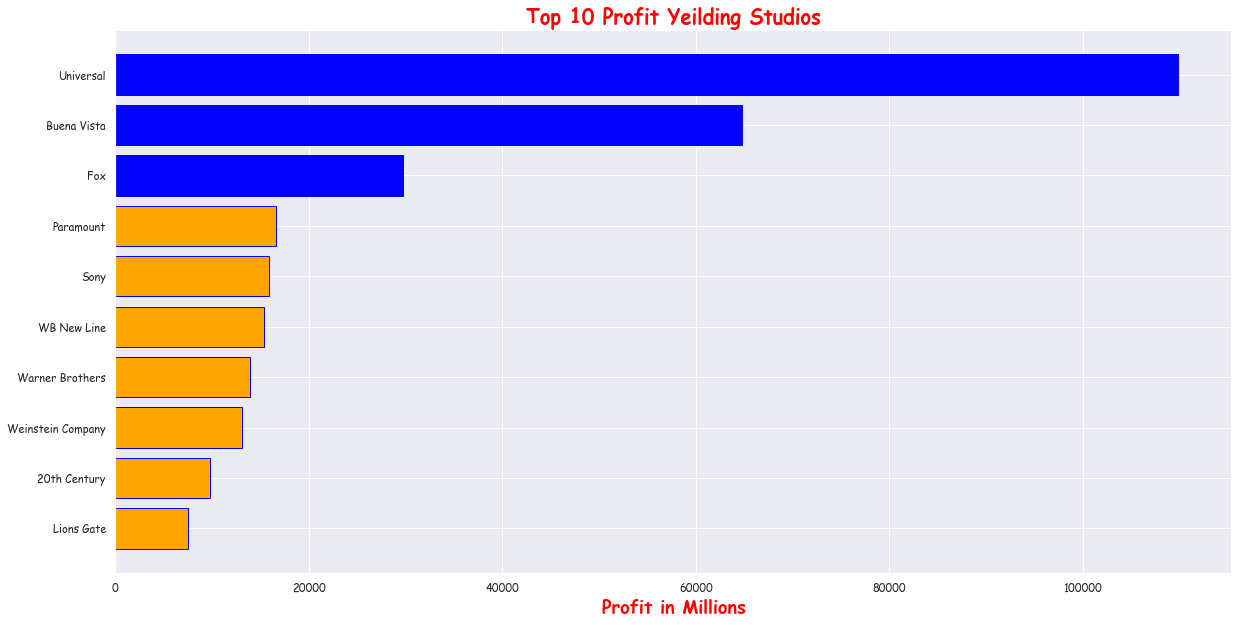

In [534]:

fig, ax = plt.subplots()
studios = ('Universal','Buena Vista','Fox','Paramount','Sony','WB New Line','Warner Brothers','Weinstein Company','20th Century','Lions Gate',)
profit = top_10_per_studios['profit_rate'].sort_values(ascending=False)
#f_share = top_10_per_studios['foreign_share']
#d_share = top_10_per_studios['domestic_share']
width = 0.35 


ax.invert_yaxis()
ax.barh(studios,profit,color=['blue', 'blue', 'blue', 'orange', 'orange','orange','orange','orange','orange','orange'],edgecolor='blue')
#ax.barh(f_share, bottom=top_10_studios_dom ,width = 0.35, label='Domestic Share')
#f_share.plot.barh(stacked=True,width = .49, color = 'b')
#d_share.plot.barh(stacked=True,width = .49,color='Red')

plt.xlabel('Profit in Millions', fontweight='bold', color = 'Red', fontsize='18', horizontalalignment='center',)
plt.rcParams["font.family"] = 'fantasy'
plt.rcParams["figure.figsize"] = (20,10)
ax.set_title('Top 10 Profit Yeilding Studios',fontweight='bold', color = 'Red', fontsize='20')
plt.savefig("12_DFD.jpg")

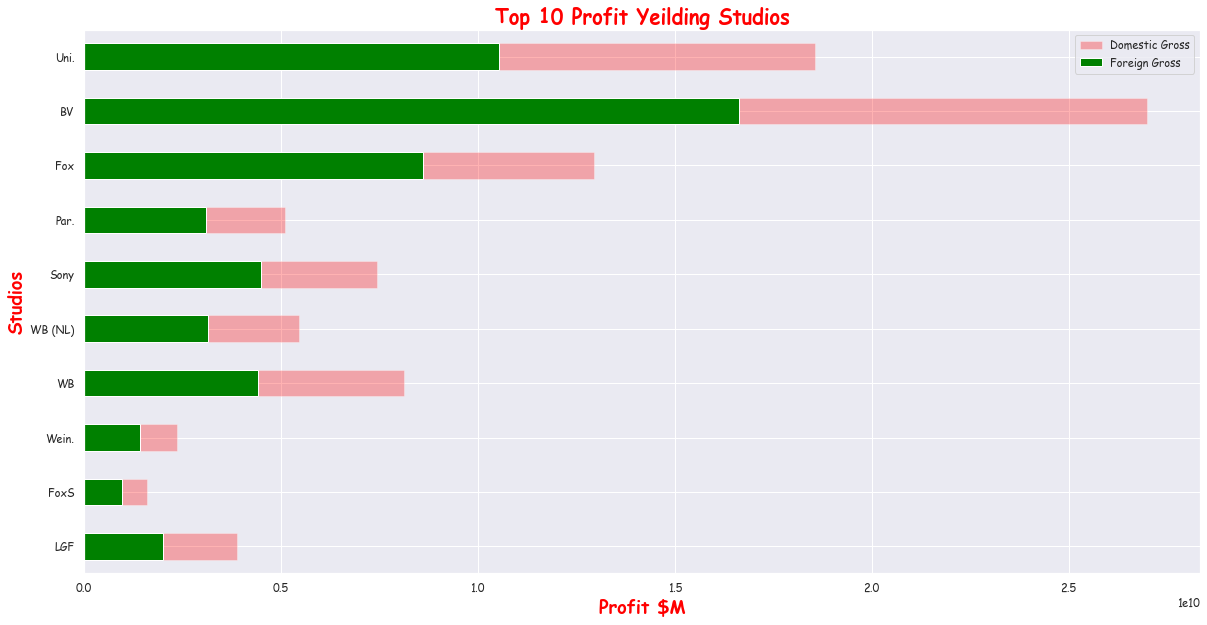

In [517]:
fig, ax = plt.subplots()
Studios = ('Universal','Buena Vista','Fox','Paramount','Sony','WB New Line','Warner Brothers','Silver Cup','20th Century','Lions Gate',)
f_share = top_10_per_studios['worldwide_gross']
w_share = top_10_per_studios['foreign_gross']
width = 0.35 
f_share.plot.barh(stacked=True,width = .49, color = 'Red',alpha=.3)
w_share.plot.barh(stacked=True,width = .49,color='Green')
plt.gca().invert_yaxis()
plt.xlabel('Profit $M', fontweight='bold', color = 'Red', fontsize='18', horizontalalignment='center',)
plt.ylabel('Studios', fontweight='bold', color = 'Red', fontsize='18', horizontalalignment='center',)
plt.legend(labels=('Domestic Gross','Foreign Gross'),fancybox=True)
plt.rcParams["font.family"] = 'fantasy'
plt.rcParams["figure.figsize"] = (20,10)
ax.set_title('Top 10 Profit Yeilding Studios',fontweight='bold', color = 'Red', fontsize='20')

plt.savefig("2C_DFD.jpg")

In [140]:
# runtime_plot

,foreign_gross,domestic_gross,runtime_minutes,profit_rate,popularity,runtime_level
0,804600000.0,241063875.0,136.0,154.667286,30.579,Long
1,946400000.0,459005868.0,141.0,324.384139,44.383,Long
3,428900000.0,229024295.0,120.0,118.648403,34.953,Long
4,680600000.0,200074175.0,148.0,193.206974,30.318,Long
5,636800000.0,448139099.0,164.0,294.341491,26.220,Long
...,...,...,...,...,...,...
1252,143000.0,29063.0,95.0,-42.224250,7.036,Short
1258,336000.0,3395391.0,86.0,1391.360000,10.091,Short
1259,336000.0,3395391.0,116.0,1391.360000,10.091,Long
1261,456000.0,1321194.0,92.0,1101.588000,10.030,Short


In [285]:
director_studio =pd.read_csv('/Users/carlosgovea/Documents/Flatiron/DSNYC103122/Phase-1-project-template/zippedData/director_profit.csv')

In [296]:
order= ['Uni.','BV','Fox','Par.','Sony','WB (NL)','WB','Wein.','FoxS','LGF']
director_studio_indx= director_studio.reindex([2,9,7,1,8,0,3,5,4,6])

In [424]:
director_studio

,studio,primary_name,profit_rate
0,WB (NL),Guillermo del Toro,41556.474000
1,Par.,Christopher Nolan,10075.949000
2,Uni.,James DeMonaco,6117.545438
3,WB,James Wan,4141.172100
4,FoxS,Tony McNamara,2050.240860
5,Wein.,John Erick Dowdle,1849.960556
6,LGF,Stephen Chbosky,1423.023560
7,Fox,Matthew Vaughn,1322.189559
8,Sony,Jon Watts,971.662437
9,BV,James Gunn,752.480016


In [400]:
director_studio_indx

,studio,primary_name,profit_rate
2,Uni.,James DeMonaco,6117.545438
9,BV,James Gunn,752.480016
7,Fox,Matthew Vaughn,1322.189559
1,Par.,Christopher Nolan,10075.949000
8,Sony,Jon Watts,971.662437
0,WB (NL),Guillermo del Toro,41556.474000
3,WB,James Wan,4141.172100
5,Wein.,John Erick Dowdle,1849.960556
4,FoxS,Tony McNamara,2050.240860
6,LGF,Stephen Chbosky,1423.023560


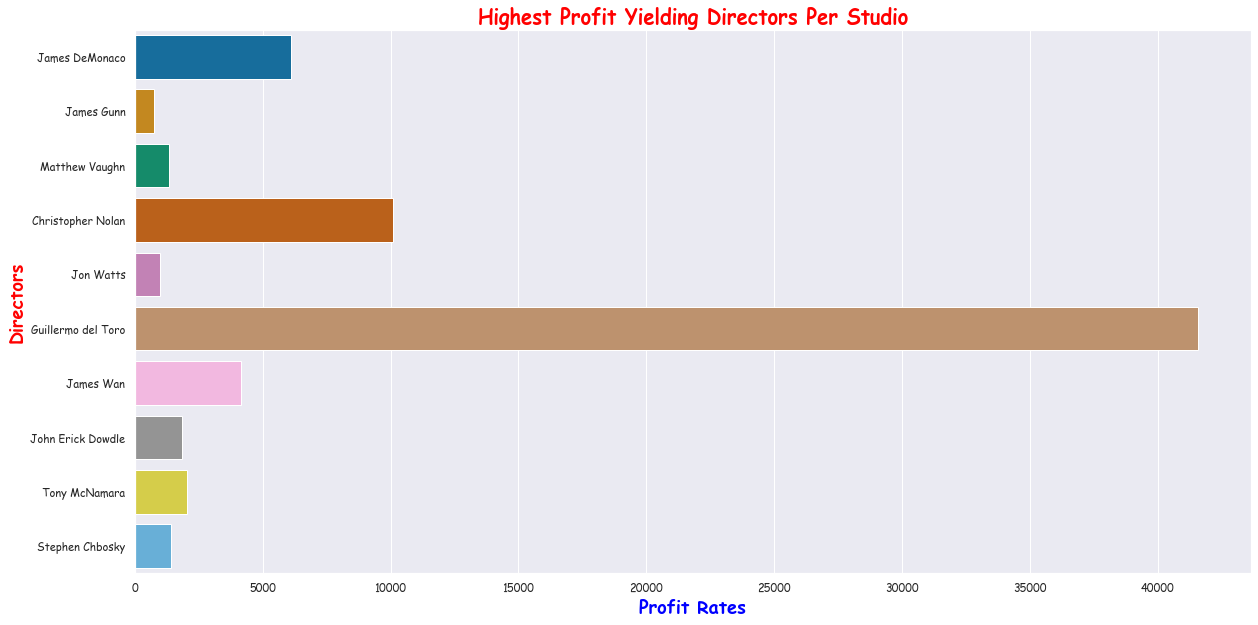

In [531]:
f, ax = plt.subplots(figsize=(20, 10))

g=sns.barplot(x="profit_rate",y="primary_name", data=director_studio_indx, palette="colorblind",orient='h')

g.set_title('Highest Profit Yielding Directors Per Studio',fontweight='bold', color = 'Red', fontsize='20')
g.set_xlabel('Profit Rates',fontweight='bold', color = 'Blue', fontsize='18')
g.set_ylabel('Directors',fontweight='bold', color = 'Red', fontsize='18')
plt.savefig("_DFD.jpg")

In [439]:
#df.groupby(director)['foreign profit'].mean()

top_10_per_studios= top_10_per_studios[['worldwide_gross','foreign_gross','domestic_gross','profit_rate']]

In [456]:
top_10_per_studios_prof= top_10_per_studios[['profit_rate','foreign_gross']]

In [459]:
top_10_per_studios_prof

,profit_rate,foreign_gross
studio,,
Uni.,109864.885395,1.054360e+10
BV,13928.216482,1.662450e+10
Fox,16577.284433,8.595300e+09
Par.,29675.312537,3.104600e+09
Sony,9721.955156,4.506800e+09
WB (NL),64787.659876,3.154600e+09
WB,15328.432055,4.406400e+09
Wein.,15838.281594,1.419000e+09
FoxS,13078.128528,9.734040e+08


In [468]:
top_10_per_studios

,worldwide_gross,foreign_gross,domestic_gross,profit_rate
studio,,,,
Uni.,1.855881e+10,1.054360e+10,7.978539e+09,109864.885395
BV,2.698363e+10,1.662450e+10,1.046563e+10,13928.216482
Fox,1.293893e+10,8.595300e+09,4.397605e+09,16577.284433
Par.,5.096752e+09,3.104600e+09,2.039651e+09,29675.312537
Sony,7.431366e+09,4.506800e+09,2.884073e+09,9721.955156
WB (NL),5.458351e+09,3.154600e+09,2.353795e+09,64787.659876
WB,8.131795e+09,4.406400e+09,3.765076e+09,15328.432055
Wein.,2.372658e+09,1.419000e+09,9.417646e+08,15838.281594
FoxS,1.611527e+09,9.734040e+08,6.625481e+08,13078.128528
